In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [2]:

sys.path.append("../")



In [3]:


from dd_package.data.dyslexia_data import DyslexiaData



In [4]:
dd = DyslexiaData(
    n_splits=1,
    n_repeats=2,
    path="../../datasets/"

    )


# Load data

In [8]:

# data_sets_xls = pd.ExcelFile("../data/Old data/demo_dub_sbj.xlsx")

data_sets_xls = pd.ExcelFile("../../datasets/Fix_Demo_test_data.xlsx")
                   
print(data_sets_xls.sheet_names)




['fixations_test', 'demography_test']


In [9]:


print("Loading Demo data: ")
tmp = pd.read_excel(data_sets_xls, 'fixations_test',)
tmp = dd._remove_missing_data(df=tmp)



Loading Demo data: 


In [10]:
tmp.replace(
    to_replace={"Sex": {"fem": 1, "f": 1, "masc": 2, "m": 2}},
    inplace=True,
)



In [13]:


tmp.astype({
    "SubjectID": str,
    "Sentence_ID": int,
    "Word_Number": int,
    "FIX_X": float,
    "FIX_Y": float,
    "FIX_DURATION": float,
})



,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,nnr8,27,1,145.9,529.1,345.0
1,nnr8,27,1,147.7,549.5,221.0
2,nnr8,27,1,181.8,550.5,204.0
3,nnr8,27,1,205.0,554.8,289.0
4,nnr8,27,1,158.6,558.5,600.0
...,...,...,...,...,...,...
15911,nnr85,17,7,1119.0,544.5,341.0
15912,nnr85,17,6,883.2,560.8,416.0
15913,nnr85,17,6,917.7,548.3,145.0
15914,nnr85,17,3,301.2,540.3,163.0


In [14]:


data_set = tmp.sort_values(by=["SubjectID"]).dropna()

print(" ", tmp.shape)
print(" ")






  (15916, 6)
 


In [15]:


data_set


,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
1326,nnr26,15,4,392.1,543.5,351
1149,nnr26,32,3,373.4,554.5,362
1148,nnr26,32,3,397.3,554.1,214
1147,nnr26,32,2,258.8,556.2,217
1146,nnr26,32,2,243.4,550.2,168
...,...,...,...,...,...,...
15616,nnr85,16,7,1228.9,535.5,231
15615,nnr85,16,7,1152.4,532.0,361
15614,nnr85,16,6,916.8,524.0,373
15625,nnr85,8,3,432.6,474.4,144


In [16]:

data_set.columns



Index(['SubjectID', 'Sentence_ID', 'Word_Number', 'FIX_X', 'FIX_Y',
       'FIX_DURATION'],
      dtype='object')

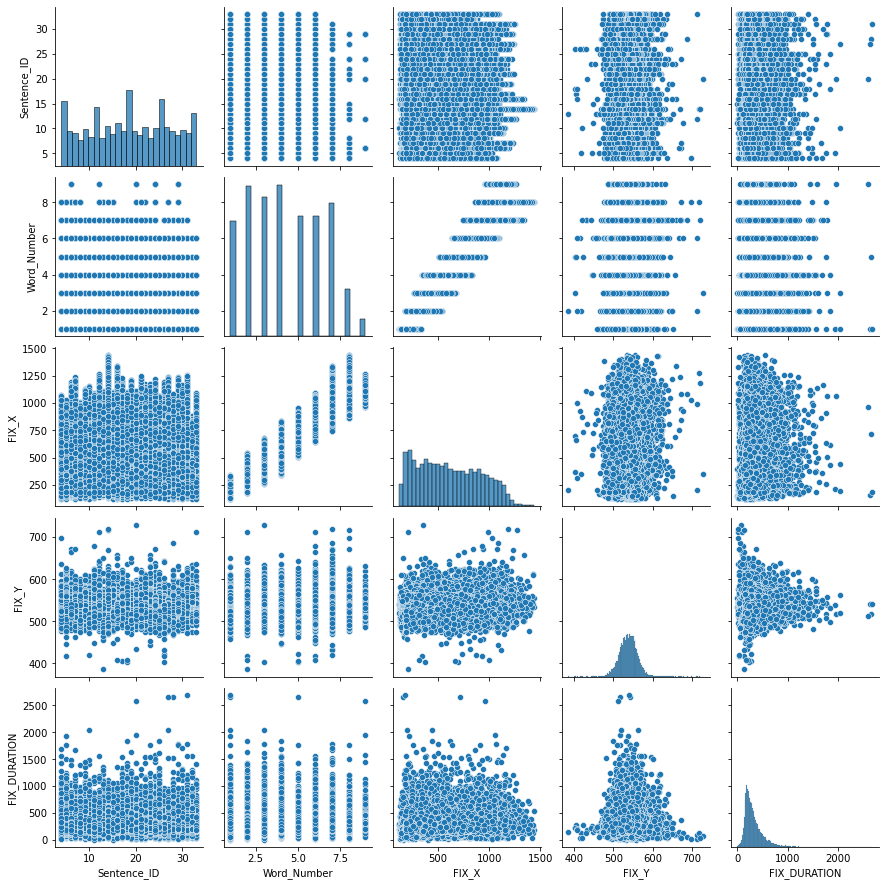

In [17]:

sns.pairplot(data=data_set)
plt.show()
    
    


In [18]:


to_exclude_at_risk = 0
# dict of dicts, s.t each dict contains pd.df of a class, e.g normal
_ = dd.get_fix_datasets()  # fixes
# concatenate pd.dfs to a pd.df
fix = dd.concat_classes_fix()

# The optimize way to exclude at-risk class
if to_exclude_at_risk == 1:
    to_exclude_at_risk = True
    fix = fix.loc[fix.Group != 2]

df_data_to_use = fix
c_features = None
indicators = [
    'SubjectID', 'Sentence_ID', 'Word_Number',
]

targets = ["Group", ]



Loading Fixation report data:
  dyslexia (59770, 7)
  norm (139507, 7)
  risk (26073, 7)
 


In [19]:




pr_fix = df_data_to_use.values
cols = df_data_to_use.columns

fix_pr = pd.DataFrame(data=pr_fix, columns=cols)


fix_pr
    
    

,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,1,10,4,1,177.3,531.8,219.0
1,1,10,4,2,200.5,545.2,247.0
2,1,10,4,3,282.7,542.4,261.0
3,1,10,4,4,358.1,545.5,268.0
4,1,10,4,4,392.8,536.3,129.0
...,...,...,...,...,...,...,...
225345,3,zrs09,33,5,743.3,562.7,160.0
225346,3,zrs09,33,5,772.5,555.8,193.0
225347,3,zrs09,33,5,941.7,561.9,219.0
225348,3,zrs09,33,5,831.8,548.8,144.0


In [20]:


fix_pr_ = fix_pr.iloc[:, 1:]

fix_pr_.head()


,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,10,4,1,177.3,531.8,219.0
1,10,4,2,200.5,545.2,247.0
2,10,4,3,282.7,542.4,261.0
3,10,4,4,358.1,545.5,268.0
4,10,4,4,392.8,536.3,129.0


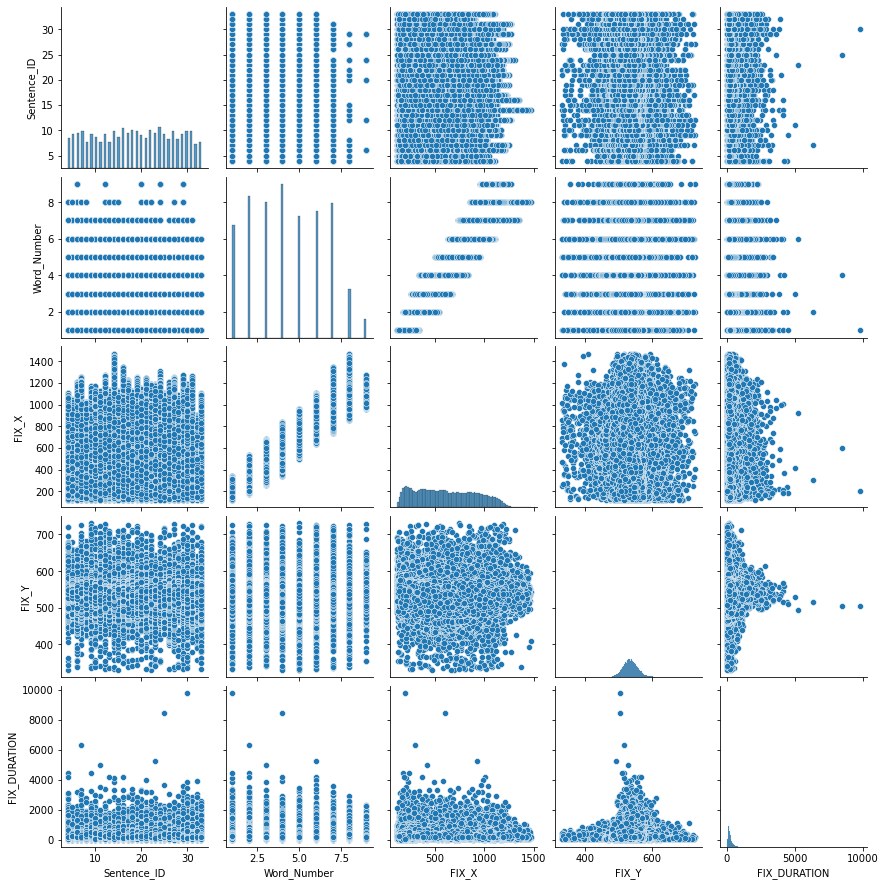

In [21]:

# Prvisious data pairplots:
sns.pairplot(data=fix_pr_)
plt.show()



In [22]:


def plot_hists(datasets, col,):
    
    colors = ["r", "y", "g"]
    fig = plt.figure(figsize=(20, 9))
    ctr = 1
    for d in range(len(datasets)): 
        data = datasets[d]
        
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = data[col].values
        bins = np.linspace(x.min(), x.max(), 40)
        ax.hist(x=x, bins=bins, color=colors[ctr])
        if d == 0:
            t = "New Test data"
        if d ==1:
            t = "Previous data"
            
        ax.set_title(t, fontsize=16)
        ctr += 1

    fig.suptitle("Distributions of " + col, fontsize=19)
    plt.show()
    
    return None



In [23]:
for data in (data_set, fix_pr):
    print(data.shape)

(15916, 6)
(225350, 7)


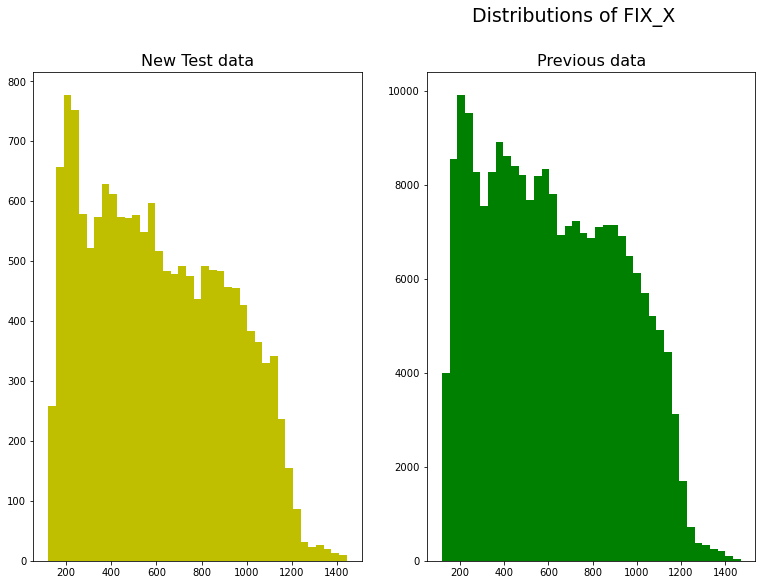

In [24]:

plot_hists(datasets=(data_set, fix_pr), col="FIX_X",)



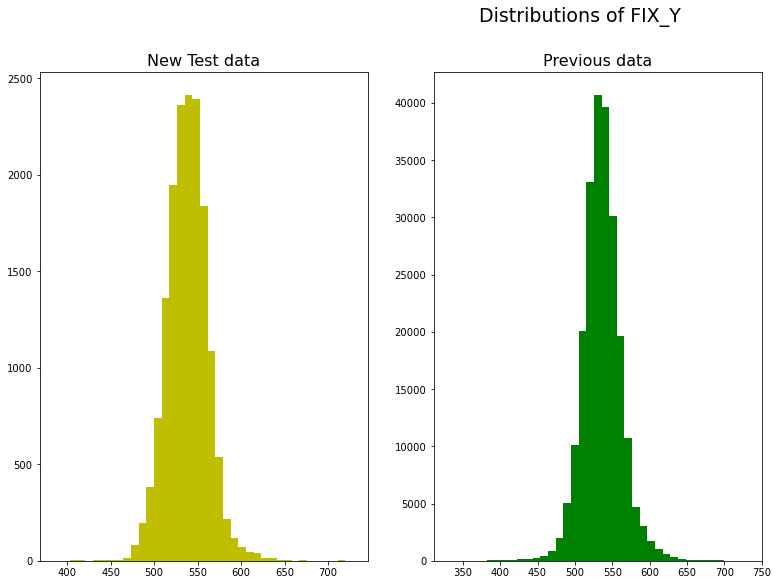

In [25]:


plot_hists(datasets=(data_set, fix_pr), col="FIX_Y",)



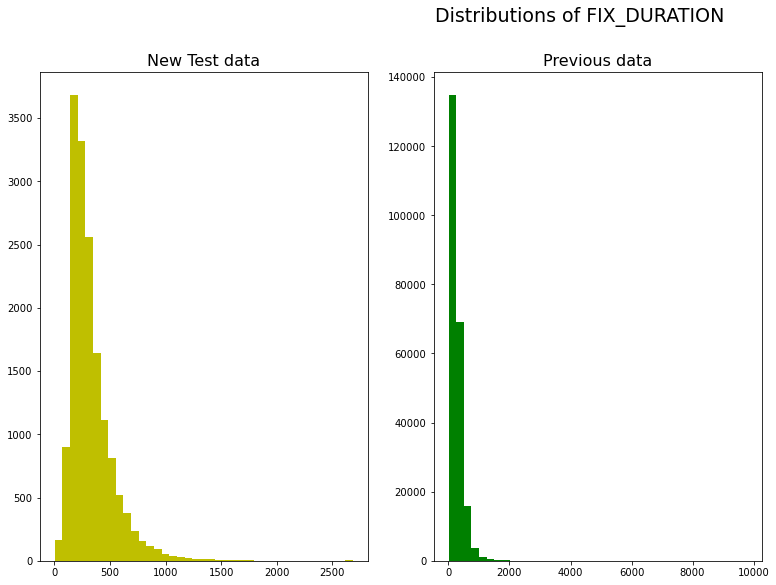

In [26]:

plot_hists(datasets=(data_set, fix_pr), col="FIX_DURATION",)





## 